In [0]:
import requests
def get_data(page_no, secret):
    r = requests.post('https://www.pola-app.pl/a/v3/get_ai_pics?page={}'.format(page_no),
                      data={'shared_secret': secret})
    page_aipics = r.json()['aipics']
    return page_aipics


In [0]:
secret = open('secret.txt', 'r').read().strip()

In [0]:
data = []
i = 0
while True:
    new_data = get_data(i, secret)
    print(len(new_data))
    if len(new_data) == 0:
        break
    data += new_data
    i += 1

5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
3639
0


Przykładowy rekord produktu

Liczba zdjęć

In [0]:
print(len(data))

58639


In [0]:
from collections import Counter
product_counter = Counter()
code2name = dict()

In [0]:
for item in data:
    code2name[item['code']] = item['product_name']
    product_counter[item['code']] += 1

In [0]:
code2company = {item['code']:item['company_id'] for item in data}

In [0]:
code2company

{'5908241710915': 306,
 '5901713010605': 12,
 '5900595002395': 649,
 '5906827011098': 149,
 '5900107002936': 74,
 '5904567050506': 43,
 '5902160642852': 48,
 '5900437010373': 496,
 '5900552001324': 140,
 '5900247002254': 436,
 '5900364535192': 1272,
 '5901957052362': 156,
 '5900617011930': 10,
 '5903895010237': 103,
 '8722700780458': 40,
 '5901177152460': 1542,
 '5908275688587': 205,
 '5900049001516': 32,
 '5903473005570': 1284,
 '5900793006270': 1016,
 '5900049003022': 32,
 '5905187109049': 110,
 '5903621012498': 219,
 '5905784341057': 97,
 '5903386050674': 769,
 '5901986080077': 621,
 '20760632': 5670,
 '5900983014139': 4,
 '5902759005723': 406,
 '5903767007594': 25,
 '5901501001228': 512,
 '5900057538103': 333,
 '5900398003933': 468,
 '5905927001619': 330,
 '5902162345515': 929,
 '5900888011653': 106,
 '5900398013437': 468,
 '5903111808310': 1308,
 '5900120005013': 99,
 '5900552000952': 140,
 '5903767008157': 25,
 '5907577230647': 1731,
 '5902360471443': 27274,
 '5900477010968': 114

In [0]:
company2count = Counter(code2company.values())

In [0]:
print(company2count)

Counter({57: 135, 44: 116, 7: 101, 9: 90, 83: 78, 84: 72, 140: 72, 252: 67, 4: 61, 10: 61, 5: 59, 20: 58, 12: 53, 185: 53, 138: 52, 100: 50, 77: 49, 49: 47, 80: 46, 41: 46, 19: 44, 28: 44, 40: 44, 295: 41, 54: 40, 285: 40, 756: 38, 2: 37, 65: 37, 101: 37, 45: 36, 82: 36, 470: 36, 172: 35, 46: 34, 74: 34, 227: 33, 496: 32, 5072: 32, 3: 31, 32: 31, 512: 31, 121: 30, 159: 30, 103: 30, 11: 29, 53: 28, 71: 28, 167: 28, 329: 28, 144: 27, 199: 27, 264: 27, 339: 26, 29: 25, 48: 25, 273: 25, 319: 25, 418: 25, 16: 24, 280: 24, 5670: 24, 1: 23, 14: 23, 99: 23, 192: 23, 201: 23, 503: 23, 365: 22, 60: 21, 105: 21, 194: 21, 212: 21, 224: 21, 601: 21, 1062: 20, 118: 20, 254: 20, 22: 19, 27: 19, 43: 19, 384: 19, 42: 18, 85: 18, 120: 18, 143: 18, 301: 18, 403: 18, 557: 18, 21: 17, 149: 17, 193: 17, 307: 17, 3199: 16, 203: 16, 387: 16, 406: 16, 812: 16, 210: 15, 468: 15, 519: 15, 62: 14, 219: 14, 294: 14, 354: 14, 158: 14, 942: 14, 968: 14, 25: 13, 67: 13, 72: 13, 110: 13, 170: 13, 218: 13, 289: 13, 645

**Marked products**

In [0]:
ids = ['5900512300108', '5900512700038', '5907667874744', '5900861430020']

In [0]:
for id in ids:
    print(code2name.get(id, 'none'))

Mlekovita Masło Polskie ekstra bez dodatków 82% 200 g
Mlekovita Favita Ser sałatkowo-kanapkowy półtłusty 270 g
none
Ludwik Płyn do naczyń miętowy 1000 g


Liczba znanych produktów

In [0]:
print(len(product_counter))

5977


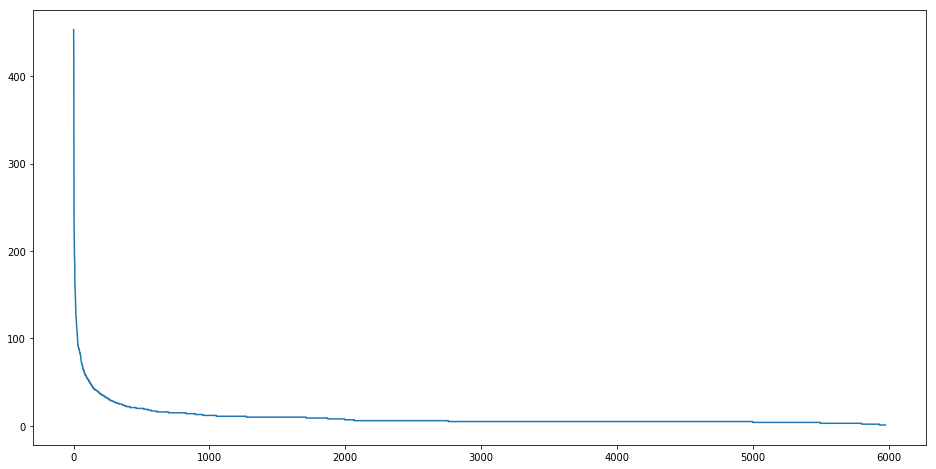

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(sorted(product_counter.values(), reverse=True))
plt.show()

### How to visualize this?

In [0]:
# thresholds
def get_threshold_count(threshold):
    # return product and photos count
    product_count = sum(count >= threshold for count in product_counter.values())
    photos_count = sum(count for count in product_counter.values() if count > threshold)
    company_count = len(set(code2company[item] for item, count in product_counter.items() if count > threshold))
    return product_count, photos_count, company_count

print(get_threshold_count(80))
print(get_threshold_count(50))
print(get_threshold_count(30))
print(get_threshold_count(25))
print(get_threshold_count(20))
print(get_threshold_count(10))
print(get_threshold_count(0))

(52, 6835, 34)
(120, 10873, 58)
(269, 16389, 101)
(357, 18385, 115)
(517, 21277, 150)
(1712, 32755, 313)
(5977, 58639, 614)


Companies count

In [0]:
print(len(set(item['company_id'] for item in data)))

614


In [0]:
import operator
product_counter_list = sorted(product_counter.items(), key=operator.itemgetter(1), reverse=True)

In [0]:
for code, count in product_counter_list:
    if product_counter[code] >= 30:
        print(code, code2name[code], product_counter[code])

5901520000059 Muszynianka Naturalna woda mineralna wysokozmineralizowana magnezowo-wapniowa 1,5 l 453
5902078000201 Cisowianka Naturalna woda mineralna niegazowana niskosodowa 1,5 l 416
5901550002955 Muszyna Skarb Życia Naturalna woda mineralna wysokozmineralizowana lekko gazowana 1,5 l 281
5906340630011 Polski Cukier Cukier biały 1 kg 227
5900541000000 Żywiec Zdrój Woda niegazowana 1,5 l 220
5902078020001 Cisowianka Naturalna woda mineralna lekko gazowana niskosodowa 1,5 l 201
5900635000022 Nałęczowianka 1,5 l niegaz P/L - butelka 194
5907069000017 Diamant Cukier biały 1 kg 191
5900085011180 Maggi Przyprawa w płynie 200 g 186
5902078000102 Cisowianka Naturalna woda mineralna gazowana niskosodowa 1,5 l 164
5903870005241 Piwo w butelce 161
5902136817550 Cukier Królewski Cukier biały 1 kg 156
5902078001208 Cisowianka Naturalna woda mineralna niegazowana niskosodowa 0,5 l 150
5900012000232 Kujawski Olej rzepakowy z pierwszego tłoczenia 1 l 143
5900512300108 Mlekovita Masło Polskie ekstra 

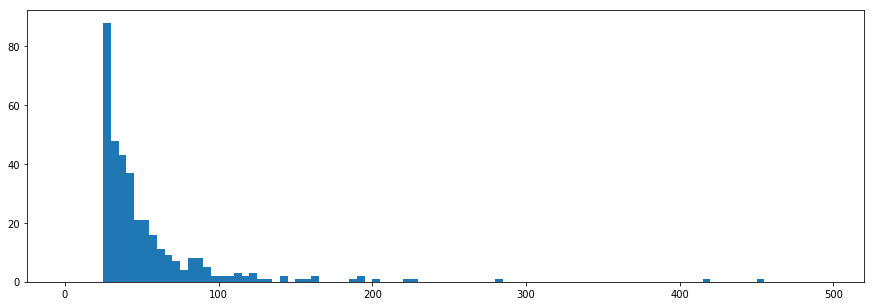

In [0]:
plt.figure(figsize=(15, 5))
plt.hist([count for _, count in product_counter_list if count >= 25], bins=range(0, 500, 5))
plt.show()

In [0]:
from PIL import Image

In [0]:
POLISH_LETTERS = [u'ąćęłńóśźżĄĆĘŁŃÓŚŹŻ',u'acelnoszzACELNOŚZZ']

def normalize_name(name):
    name = name[:25].strip()
    for i in range(len(POLISH_LETTERS[0])):
        name = name.replace(POLISH_LETTERS[0][i], POLISH_LETTERS[1][i])
    name = ''.join([c if ord(c) < 128 and ord(c) > 47 else " " for c in name])
    return name

In [0]:
normalize_name("śmietana")

'smietana'

In [0]:
import os
import operator
import multiprocessing as mp

data_dir = 'Pola25'
os.makedirs(data_dir, exist_ok=True)

existing_dirs = set()
existing_files = set()

for dir in os.listdir(data_dir):
    if dir.startswith('.'):
        continue
    existing_dirs.add(dir)
    for file in os.listdir(os.path.join(data_dir, dir)):
        if file.endswith('.jpg') or file.endswith('.png'):
            s = os.path.join(dir, file)
            existing_files.add(s)

In [0]:
from time import sleep

def download_pic(aipic):
    prod = u'{}#{}#{}'.format(normalize_name(code2name[aipic['code']]), aipic['code'], aipic['company_id'])
    dir = os.path.join(data_dir, prod)
    if not os.path.exists(dir):
        os.makedirs(dir)
        
    existing_dirs.discard(prod)

    file = aipic['url'].split('/')[-1]
    filename = os.path.join(prod, file)
    filename_jpg = os.path.splitext(filename)[0] + '.jpg'
    if not filename_jpg in existing_files:
        print('Downloading: '+filename)
        while True:
            try:
                r = requests.get(aipic['url'], stream=True)
                if r.status_code == 200:
                    with open(os.path.join(data_dir, filename), 'wb') as f:
                        for chunk in r:
                            f.write(chunk)

                    if filename.endswith('.png'):
                        im = Image.open(os.path.join(data_dir, filename))
                        if im.mode != 'RGB':
                            im = im.convert('RGB')
                        im.save(os.path.join(data_dir, filename_jpg), quality=100)
                        os.remove(os.path.join(data_dir, filename))
                break
            except Exception:
                print('connection fail' + filename_jpg)
    existing_files.discard(filename_jpg)

In [0]:
pool = mp.Pool(8)

pool.map(download_pic, data)

In [0]:
len(existing_files)

421

In [0]:
for filename in existing_files:
    print('Deleting: '+os.path.join(data_dir, filename))
    #os.remove(os.path.join(data_dir, filename))

for dir in existing_dirs:
    print('Deleting: '+os.path.join(data_dir, dir))
    ds_store = os.path.join(data_dir, dir, '.DS_Store')
    if os.path.exists(ds_store):
        print(ds_store)
        #os.remove(ds_store)
    print(os.path.join(data_dir, dir))
    #os.rmdir(os.path.join(data_dir, dir))

In [0]:
import os

In [0]:
os.listdir('.')

['Pola25',
 'convert_and_resize.py',
 'data_summary.ipynb',
 'Pola25_small',
 '.ipynb_checkpoints',
 'secret.txt']

In [0]:
import shutil
for directory in os.listdir('Pola25_small'):
    path = os.path.join('Pola25_small', directory)
    if len(os.listdir(path)) < 25:
        print(path)
        shutil.rmtree(path)

Pola25_small/ANTIDRAL#5909990126118#3199
Pola25_small/OFF  Protect Repelent prz#8711800112054#1160
Pola25_small/Mlekovita Mazdamer Ser w#5900512110530#9
Pola25_small/Winiary Majonez Dekoracyj#5900862212489#100
Pola25_small/Dosia Kolor Proszek do pr#5900627035346#45
Pola25_small/Rolnik Cwikla z chrzanem#5900919000489#339
Pola25_small/Sokolow Salami peperoni 1#5902310007326#260
Pola25_small/ LASKIE MOCNE BUT 0 33 L#5900535002041#82
Pola25_small/Hortex Pomarancza z Mango#5900500029325#54
Pola25_small/MENMAG#5902020845850#295
Pola25_small/Woda KRYNKA n gaz 1 5l 6s#5904060153315#626
Pola25_small/Delecta Anatol Kawa zbozo#5900983014177#4
Pola25_small/nowe piwo 15#5903111989750#365
Pola25_small/Olimp Lemon 700g Iso Plus#5901330024221#294
Pola25_small/Ludwik plyn do mycia szyb#5900498003840#28
Pola25_small/CARBO TABLETKI VP WEGIEL#5903546007081#1417
Pola25_small/Ludwik plyn uniwersalny b#5900498000245#28
Pola25_small/MK Ananas plastry w lekki#5904947609065#1524
Pola25_small/Chrupki kukurydzian

Pola25_small/Tic Tac Orange Drazetki o#80052333#1584
Pola25_small/Bakoma 7 zboz men jagoda #5900197017360#5
Pola25_small/PIWO WI NIOWE 0 5L FORTUN#5902709615200#354
Pola25_small/RYKI SER EDAM PLASTRY 150#5902208000705#345
Pola25_small/Sante Kasza gryczana bial#5900617014764#10
Pola25_small/Sos meksykanski Fannex#5900854002913#342
Pola25_small/Cholinex Intense 2 5 mg  #5909990419944#6409
Pola25_small/Princessa longa kokosowa#5900862024570#100
Pola25_small/Lay s Zielona Cebulka Chi#5900259031198#172
Pola25_small/Mix tluszczowy#5900820003234#7
Pola25_small/Costa Czarna porzeczka Na#5900500018275#54
Pola25_small/Kupiec Kruche ciasteczka#5906747172916#65
Pola25_small/MATOPAT   CLASSIC#5900516899561#22
Pola25_small/Tao Tao Sos sojowy ciemny#5901882220027#203
Pola25_small/NIVEA 40ml Q10 Plus serum#5900017041377#46
Pola25_small/Bambino Mydlo z lanolina#5900017814100#46
Pola25_small/KFD   VitD K2#5901947666678#1677
Pola25_small/Morliny Boczek w kostce 1#5900244001199#48
Pola25_small/Olej Wyborn

Pola25_small/Mlekovita Favita Ser sala#5900512700021#9
Pola25_small/Tiger Energy Drink Gazowa#5900334009142#57
Pola25_small/Fort Kawa palona mielona#5900788401158#666
Pola25_small/Paola Syrop o smaku malin#5900805000876#273
Pola25_small/Krakus Konserwa turystycz#5902160773303#48
Pola25_small/Granulki do udrozniania r#5900931008999#42
Pola25_small/CYMES SYROP SLONECZNE OWO#5900200000907#356
Pola25_small/Sol spozywcza jodowana 1#5907625337830#887
Pola25_small/Okej sok marchew pomaranc#5904215119135#263
Pola25_small/Dax Sun Balsam ochronny d#5900525029218#800
Pola25_small/BRITTA 4x100g Ryz dlugozi#5906936666936#262
Pola25_small/Herbapol Smaki Slonca Syr#5900956101590#138
Pola25_small/7UP Lemon Napoj gazowany#5900497030946#77
Pola25_small/Piotr i Pawel Nektar bana#5908312135227#406
Pola25_small/4002039706904#4002039706904#1527
Pola25_small/5900014002876#5900014002876#4496
Pola25_small/Joanna Professional Guma#5901018016210#227
Pola25_small/Firma Roleski Delikatesow#5901044017854#199
Pola25

Pola25_small/NIMESIL#5909991040338#6455
Pola25_small/Danmis Ser kozi twardy w#5901680000609#491
Pola25_small/PIEROGI Z MIESEM 400G U J#5901398910092#643
Pola25_small/JOGURT SOKOLSKI 400G BRZO#5901194000386#7
Pola25_small/cukier trzciny nierafinow#5900617029492#10
Pola25_small/Mlekovita Super Body Acti#5900512999593#9
Pola25_small/Mlekovita Havarti Ser bez#5900512999838#9
Pola25_small/Gold Drop Floor Plyn Uniw#5901474029090#501
Pola25_small/PAPRYKARZ Z LOSOSIA 250g#5907623262868#987
Pola25_small/20318208#20318208#5670
Pola25_small/Lubelska Cytrynowka Likie#5902573006111#144
Pola25_small/Twistos Texas Grill Przek#5900259029799#172
Pola25_small/GRAAL Tunczyk rozdrobnion#5903895020038#103
Pola25_small/Herbapol Dzem aksamitny t#5900956201122#138
Pola25_small/SMAR MIEDZIOWY K2 400ML#5906534007735#983
Pola25_small/Hochland Gouda Ser topion#5902899137421#212
Pola25_small/Wawel Deserowa Czekolada#5900102018161#3
Pola25_small/Sante Platki zytnie 400 g#5900617000408#10
Pola25_small/Jan Niezbedny 

Pola25_small/Twarog sernikowy VITELLO#5903240584239#964
Pola25_small/CZOSNEK STAROPOLSKI 20G#5901135024716#252
Pola25_small/Konstancin Dawne Piwo jas#5901549250787#716
Pola25_small/Kupiec Cos na zab Owsiank#5906747170684#65
Pola25_small/Orzeszki drazetki 70 g#5902978002732#85
Pola25_small/Bebilon Alerlac Bezgluten#5900852924316#254
Pola25_small/Gellwe Galaretka smak pom#5900552009795#140
Pola25_small/Kasztelan niepasteryzowan#5903082205576#329
Pola25_small/Pudliszki Ketchup do pizz#5900783008642#19
Pola25_small/sok Vital Fresh jablkowo #5900446013761#3146
Pola25_small/Smak Chrzan tarty 270 g#5901871001491#1029
Pola25_small/Paola Syrop o smaku malin#5900805002740#273
Pola25_small/Duetka familijna#5900278009055#757
Pola25_small/PARACETAMOL POLFA LODZ TA#5909990699513#825
Pola25_small/Przysnacki Prazynki solon#5900073020262#264
Pola25_small/Wafle Familijne o smaku c#5900352004518#84
Pola25_small/Tymbark Wisnia jablko Nap#5900334006233#57
Pola25_small/Air Wick 100  Naturalna m#305994301656

Pola25_small/EkoWital bulion wolowy w#5908249971271#909
Pola25_small/Kubus Go  Marchew jablko#5901067400268#418
Pola25_small/Vifon Kurczak pikantny Zu#5901882014893#203
Pola25_small/Familijny Szampon Do Wlos#5900057020806#333
Pola25_small/GOSIA WORECZKI DO LODU BA#5904771004395#469
Pola25_small/mleko prawdziwe bez lakto#5900120010277#99
Pola25_small/Fort Kawa palona mielona#5900788201017#666
Pola25_small/nowe piwo 21#5903111989811#365
Pola25_small/GARGARIN AFLOFARM#5909990178810#295
Pola25_small/Grzeski Toffi Wafel przek#5900394006181#84
Pola25_small/AA Men Sensitive Pianka d#5900116020167#193
Pola25_small/Okocim ciemne 0 5l#5900014002845#329
Pola25_small/Piwo Komes Porter Baltyck#5902709615194#354
Pola25_small/ZIELNIK APTECZNY MELISA F#5909990029242#138
Pola25_small/Cola orginal 0 5l Biedron#5901597866206#273
Pola25_small/Air Wick Pure Kwitnaca wi#5900627066302#45
Pola25_small/Tymbark Czerwony grejpfru#5900334013774#57
Pola25_small/Zoladkowa Gorzka Czysta d#5902573004278#144
Pola25_sm

Pola25_small/Smak Smaki  wiata Suszone#5901871004140#1029
Pola25_small/Evr Deo Repair spray do s#5904730786485#383
Pola25_small/Assuan herbata cytrynowa#5900888012100#106
Pola25_small/Herbapol Owocowa Spizarni#5900956102429#138
Pola25_small/KEFIR 1 8  400G SOMLEK ML#5901194000164#7
Pola25_small/2068273306821#2068273306821#550
Pola25_small/Maslo ekstra Lukow#5907616900036#1086
Pola25_small/OTINUM#5909990167814#1417
Pola25_small/KUCHAREK 500G#5901135000468#252
Pola25_small/Cykoria Zupa grochowa 70#5900288001193#968
Pola25_small/Bakoma Jogurt Bio z trusk#5900197022388#5
Pola25_small/NeoMag Forte  MgB6 Forte #5908275682479#295
Pola25_small/Lisner Tunczyk w kawalkac#5900344201406#121
Pola25_small/Tymbark Pomidor pikantny#5900334001788#57
Pola25_small/Lowicz 100  z owocow Extr#5900397733169#83
Pola25_small/Profi Zupa pomidorowa z m#5901696000839#607
Pola25_small/KRESTO Siemie lniane 500#5902451022226#26
Pola25_small/Farmona Herbal Care My Na#5900117002896#307
Pola25_small/5901398071496#59013

Pola25_small/butelka 330 ml   z gruszk#5903240076161#595
Pola25_small/NIVEA Blyskawicznie nawil#5900017047614#46
Pola25_small/SKRZYP#5901088008320#120
Pola25_small/MAGNEZ B6 OPTIMAL#5904264000859#695
Pola25_small/Zel do WC Kamien i Rdza#5900627061888#45
Pola25_small/AkusTone#5906071008486#295
Pola25_small/Danone Fantasia Jogurt kr#59030133#53
Pola25_small/RAFFAELLO 150 g#8000500023976#1584
Pola25_small/Marwit Sok 100  swiezy gr#5904373000085#2773
Pola25_small/APPETITA PRZYPRAWA DO MIE#5902795000393#84
Pola25_small/FIXSIN Zestaw podsatwowy#5902768521139#690
Pola25_small/napoj biedronka#5901068036503#423
Pola25_small/Piwo  cena zawiera 0 35 z#5901359014784#2
Pola25_small/Prazubr Niepasteryzowane#5901359054919#2
Pola25_small/Delikatne  puszysty serek#5900531000812#20
Pola25_small/5905279533394#5905279533394#794
Pola25_small/De serek Jana truskawkowy#5902476000278#153
Pola25_small/Helio Masa makowa z bakal#5905617009000#557
Pola25_small/Jacobs Cronat Gold Kawa r#8711000520956#127
Pola25_sm

Pola25_small/Kubus play  Multiwitamina#5901067400220#57
Pola25_small/Pudliszki Ketchup super p#5900783006426#19
Pola25_small/Zielona herbata   dla mie#5904567050131#43
Pola25_small/Bialy Jelen Szampon Dla M#5900133009978#185
Pola25_small/Woseba Arabica Kawa palon#5901123181452#812
Pola25_small/DEKORAL AKRYLIT W  NIEZNO#5904000810674#371
Pola25_small/AA Men Protection Non Sto#5900116023335#193
Pola25_small/Brulion do religii#5905184000387#544
Pola25_small/Mietowka z limonka#5902573005466#144
Pola25_small/Jacobs Kr nung Kawa rozpu#5901480000519#105
Pola25_small/Almusso easy a 10 opak  J#5907678200228#1979
Pola25_small/Herbata owocowa sliwka ka#5902806060477#435
Pola25_small/musztarda stolowa#5906425111473#101
Pola25_small/Gellwe Budyn smak smietan#5900552000174#140
Pola25_small/Podklad szkol  na biurko#5903235161667#76
Pola25_small/Primavera Woda zrodlana g#5903978396517#34
Pola25_small/Bielenda 2w1 drogocenna a#5902169014551#192
Pola25_small/Piwo Marcowe w butelce  c#5902709615286#354
P

Pola25_small/Powidla sliwkowe 280 g Ra#5901529003136#321
Pola25_small/5900191014709#5900191014709#403
Pola25_small/BoboVita Warzywa z indyki#5900852008382#254
Pola25_small/o Sole Sol kamienna jodow#5900977001862#62
Pola25_small/Kotlin Ketchup lagodny 21#5900385012030#83
Pola25_small/Kinga Pieninska Naturalna#5901268004159#268
Pola25_small/Kubus Mus 100  jablko ban#5901067400848#57
Pola25_small/WODA MINERALNA SELENKA NI#5905182000051#348
Pola25_small/Zubrowka Bison Grass Wodk#5900343005296#756
Pola25_small/Ziaja Yego Sensitiv Kojac#5901887038191#44
Pola25_small/Bracia Koral Lody jak daw#5902121023454#200
Pola25_small/Kot nyi Sol morska z piep#5901032041755#224
Pola25_small/BIALY JELEN HIPOALERGICZN#5900133010110#185
Pola25_small/Muszynianka Naturalna Wod#5901520000073#18
Pola25_small/Exclusive krem antyperspi#5901185002498#773
Pola25_small/IBUM FORTE MINICAPS#5909991013004#601
Pola25_small/Piatnica  mietankowy Smak#5901939000404#20
Pola25_small/Virtu Pierogi z truskawka#5906295830344#35

Pola25_small/Luksja Care Pro Soften Kr#5900998005436#167
Pola25_small/Luksja Creamy Roza i prot#5900998006297#167
Pola25_small/Lekki krem nagietkowy#5907502687171#1062
Pola25_small/Hortex Multiwitamina Sok#5900500031533#54
Pola25_small/Kubus 100  Banan marchew#5901067404433#57
Pola25_small/Mleko UHT 1 5 #5900120015531#99
Pola25_small/Podpiwek Warminski#5902528789724#746
Pola25_small/Day up banan gruszka  cza#5902221668074#3234
Pola25_small/Lisner Filety sledziowe w#5900344403350#121
Pola25_small/CHUSTECZKI HIGIENICZNE BO#5900579000836#129
Pola25_small/ZIAJA MED KURACJA ULTRANA#5901887032922#44
Pola25_small/Cheetos Spirals Chrupki k#5900259029096#172
Pola25_small/ZIAJA KOZIE MLEKO MYDLO P#5901887009924#44
Pola25_small/Bakalland Ba  banan Baton#5900749610995#4
Pola25_small/Bakoma Premium Gold Jogur#5900197005473#5
Pola25_small/Herbapol Herbaciany Ogrod#5900956003610#138
Pola25_small/Develey Musztarda delikat#5906425111398#101
Pola25_small/ANIDA   OLIVE CREAM KREM#5900031001791#553
Pola25

Pola25_small/LOMZA WYBOROWE BUT 0 33L#5903538900284#82
Pola25_small/Bond Fresh Balsam po gole#5901501010503#512
Pola25_small/Czekolada 0 5l#5907439112036#823
Pola25_small/Wielkopolski Olej rzepako#5903264000234#561
Pola25_small/Paracetamol 125 mg#5909990265527#630
Pola25_small/Wloclawek Koncentrat pomi#5901248001659#83
Pola25_small/5h2g#5903767008676#25
Pola25_small/Sadecki Bartnik miod wiel#5907707116667#290
Pola25_small/Oliwkowy odzywczo ochronn#5904567050414#43
Pola25_small/galaretka o smaku agresto#5900552041238#140
Pola25_small/Barwa Ziolowa Szampon skr#5902305007126#123
Pola25_small/Bros Lep na okno na muchy#5904517002579#176
Pola25_small/Malwa Koper wloski Herbat#5902781000116#258
Pola25_small/Seko Przysmak kaszubski F#5902353009769#462
Pola25_small/Joanna Sensual Balsam do#5901018012304#227
Pola25_small/IBUPROFEN AFLOFARM#5909990664719#295
Pola25_small/Vis Plantis Herbal Vital#5904567055006#43
Pola25_small/Mlekovita Maslo Ekstra os#5900512300146#9
Pola25_small/Herbapol Malina z

Pola25_small/Oshee Vitamin Energy Wita#5908260252052#159
Pola25_small/20864804#20864804#5670
Pola25_small/SAMBUCOL JUNIOR#5908218989665#444
Pola25_small/OLEJ Z KOKOSA BIO 900ML#5902340970690#1308
Pola25_small/WODA ZRODLANA AQUA#5908235943398#470
Pola25_small/tolpa :expert  kids  past#5907608610523#74
Pola25_small/Len mielony 200 g#5907078675183#777
Pola25_small/Autoland Moto Care do czy#5900304007574#379
Pola25_small/Sierpc Ser kasztelan klas#5901753000864#343
Pola25_small/Bella Cotton Platki kosme#5900516400033#22
Pola25_small/Vital fresh power juice a#5902854101276#272
Pola25_small/Kamis Sol ziolowa 35 g#5900084044011#49
Pola25_small/Wars Fresh Pianka Do Gole#5900793038127#1016
Pola25_small/SM Gostyn Mleko gostynski#5900691031053#218
Pola25_small/5908312136484#5908312136484#406
Pola25_small/BRU OXFRD SZY A4 96K 90G#5904017000419#309
Pola25_small/Splendido Majonez Kanapko#5906425150335#101
Pola25_small/MLEKO KONECKIE 2 #5900628004235#285
Pola25_small/Dawtona Fasola Pinto 400#590171300

Pola25_small/CLOTRIMAZOLUM HASCO#5909991082314#601
Pola25_small/E  Wedel WW Cztery wafelk#59042396#41
Pola25_small/ZIAJA MEN YEGO KREM NAWIL#5901887020103#44
Pola25_small/Paola syrop i smaku malin#5900805005154#273
Pola25_small/Dary Natury Ekologiczna p#5902768527520#411
Pola25_small/Gellwe Fitella Musli chru#5900552025016#140
Pola25_small/DIPHERGAN#5909990804610#1417
Pola25_small/CAPP  MRB o smaku orzecho#5900649064256#441
Pola25_small/Cholinex 150 mg Pastylki#5909990712694#2755
Pola25_small/Zbyszko 3 Cytryny Napoj g#5906441330704#280
Pola25_small/Bakoma Satino Desery  wia#5900197022524#5
Pola25_small/Wyborowa Polski Ziemniak#5900191014242#403
Pola25_small/Muszyna Cechini Naturalna#5903427830203#523
Pola25_small/Bebilon Nutriton Preparat#5900852870002#254
Pola25_small/Firma Roleski Delikatesow#5901044017878#199
Pola25_small/Mizgier jajka kurze kl  M#5907810568018#924
Pola25_small/Bakalland Ba  Protein Aft#5900749631969#4
Pola25_small/WODORU NADTLENEK 3  LABOR#5909990035977#1177
Pola25

Pola25_small/GOSIA Woreczki z suwakiem#5904771008546#469
Pola25_small/ZIAJA ZIAJKA ZEL DO ZEBOW#5901887003564#44
Pola25_small/Joanna Naturia body Peeli#5901018011161#227
Pola25_small/Krakuski Duelki Herbatnik#5901414204501#210
Pola25_small/tolpa Dermo Baby Delikatn#5907608614958#74
Pola25_small/GRAND NAPOJ MULTIWITAMINA#5901088006340#120
Pola25_small/Milko Acti Vege Jogurt ja#5900820019372#7
Pola25_small/Primavika Tahini naturaln#5900672300871#325
Pola25_small/Pr sident Camembert Natur#5906207510074#132
Pola25_small/ORZESZKI ZIEMNE OK S#5908235940625#470
Pola25_small/Oshee Szlachetna Paczka N#5908260252632#159
Pola25_small/Rolnik Premium Cebulka zl#5900919003572#339
Pola25_small/Tymbark Pomidor Sok 100 #5900334001757#57
Pola25_small/NO36 150ml Antyperspirant#5901501015256#512
Pola25_small/Herbapol Owocowa Spizarni#5900956103488#138
Pola25_small/Krem do rak i paznokci gl#5901501016192#512
Pola25_small/Hortex Pomarancza Brzoskw#5900500027857#54
Pola25_small/5902403569014#5902403569014#30

Pola25_small/Filety sledziowe w sosie#5901576051012#1651
Pola25_small/ Eliteski  Wafelek kakaow#5902978040352#85
Pola25_small/CLEANHANDS   ANTYBAKTERYJ#5901185006830#773
Pola25_small/Oxy Spotless White odplam#5900931015676#42
Pola25_small/POLPRIL#5909990924608#503
Pola25_small/Loyd Yunnan Herbata czarn#5900396000705#16
Pola25_small/Majonez Napoleonski#5901926018016#87
Pola25_small/EVRA FISH FILETY  LEDZIOW#5908241636529#1040
Pola25_small/Hellena Family Napoj nieg#5900352011448#84
Pola25_small/Vitax Inspirations Malina#5900175431393#435
Pola25_small/Provitus Buraczki zasmaza#5900580001846#146
Pola25_small/GOZDZIKI#5901135000185#252
Pola25_small/Sierpc Ser krolewski wedz#5901753000635#343
Pola25_small/Bakoma Jogurt naturalny t#5900197013065#5
Pola25_small/5908230522475#5908230522475#513
Pola25_small/Krasnystaw Kefir 250 g#5902057000802#285
Pola25_small/Almette z pomidorami dojr#5902899127187#212
Pola25_small/PASTA WEGIERSKA PAPRYKOWA#5900919018354#339
Pola25_small/Teekanne Fresh Orange M

Pola25_small/5901713013309#5901713013309#12
Pola25_small/Chusteczki higieniczne Ve#5901478001306#14
Pola25_small/Brackie Pils Piwo jasne 5#5900699100133#80
Pola25_small/tolpa Green Matowienie Ma#5907608613036#74
Pola25_small/pierniki z nadzieniem#5907471400610#198
Pola25_small/MIG DLA DZIECI FORTE O SM#5909991060763#6455
Pola25_small/CELIKO 45g Kisiel o smaku#5900038001541#753
Pola25_small/PALUSZKI CYMES SEZAMOWE 3#5907478400101#1266
Pola25_small/Kwidzyn Groszek konserwow#5901581100026#486
Pola25_small/Viscoplast Polopor Przyle#5902658220029#78
Pola25_small/Kupiec Kruche ciasteczka#5906747172220#65
Pola25_small/MAK ZLOTY LAN JAJECZ#5908235941240#470
Pola25_small/20857936#20857936#9
Pola25_small/madero ketchup#5906425121373#101
Pola25_small/CLEMASTINUM HASCO#5909991107314#601
Pola25_small/SINECOD#5909990718221#6515
Pola25_small/NIVEA Soft Krem intensywn#4005900009319#46
Pola25_small/Ananas plaster 565g#5902619004088#1703
Pola25_small/lays chipsy#5900259018519#172
Pola25_small/Trybunal E